# POC for Region Perturbation Algorithm with Inpainting as Flipping/Perturbation Technique

Playground for openCV's inpainting method. In this notebook we will have a bare-minimum implementation of the algorithm.

Inpainting using a generative model for perturbation-based explanation methods was introduced in [[1]](https://openaccess.thecvf.com/content/ACCV2020/html/Agarwal_Explaining_image_classifiers_by_removing_input_features_using_generative_models_ACCV_2020_paper.html).

There are two official examples from openCV:

1. Linked in [function documentation](https://docs.opencv.org/4.x/d7/d8b/group__photo__inpaint.html#gaedd30dfa0214fec4c88138b51d678085) from [GitHub](https://github.com/opencv/opencv/blob/dad26339a975b49cfb6c7dbe4bd5276c9dcb36e2/samples/python/inpaint.py)
1. From [tutorial](https://docs.opencv.org/4.x/df/d3d/tutorial_py_inpainting.html)

## 1. Setup

Load libraries and image with pre-processing steps.

In [1]:
import cv2
import torchvision
import numpy
import torch
from torchvision import transforms
from matplotlib import pyplot as plt

transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Resize((224, 224)),
  transforms.ConvertImageDtype(torch.float),
])

# Load image
img_for_tensor: numpy.array = cv2.imread('../../data/castle.jpg')
# Convert from BGR to RGB color space
img_for_tensor = img_for_tensor[..., ::-1]
img_for_tensor = img_for_tensor.copy()

# Convert image to tensor to create the mask
X: torch.Tensor = transform(img_for_tensor)

## 2. Generating mask

The mask should have the same dimensions as the image and can only have one channel instead of three channels.

1. Convert image to grayscale (3-channels to 1-channel).
1. Erase patch for inpainting (set to 0).

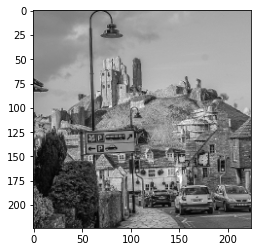

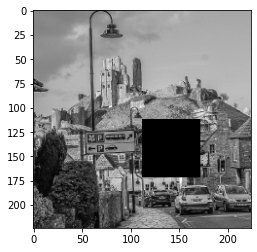

In [2]:
# Convert image to grayscale
gray_x = torchvision.transforms.functional.rgb_to_grayscale(img=X, num_output_channels=1)
plt.imshow(gray_x.numpy().transpose((1, 2, 0)).squeeze(), cmap='gray')
plt.show()

# Erase patch in the image which will be used to create the mask
erased_x: torch.Tensor = transforms.functional.erase(img=gray_x, i=112, j=112, h=60, w=60, v=0)
plt.imshow(erased_x.numpy().transpose((1, 2, 0)).squeeze(), cmap='gray')
plt.show()

# Create mask from the erased patch
# All pixels with value 0 (black) will be set to True and all other pixels to False
# True pixels in mask will be inpainted
mask: torch.Tensor = (gray_x != erased_x).int()
# Ensure tensor is in CPU and convert to numpy array with data type uint8 (8-bit unsigned integer)
# OpenCV only accepts masks with 8-bits data type
# Convert from CHW format to HWC format
mask = mask.cpu().numpy().transpose((1, 2, 0)).astype(numpy.uint8)

## 3. Inpainting

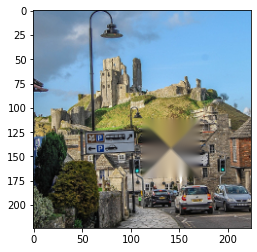

In [3]:
# Load image
img: numpy.array = cv2.imread('../../data/castle.jpg')
# Inpainting
dst: numpy.array = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
# Convert dst from BGR to RGB color space. OpenCV uses BGR color space
plt.imshow(dst[..., ::-1])